# **1. Perkenalan Dataset**


Sumber dataset [Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

Kumpulan data ini aslinya berasal dari Institut Nasional Diabetes, Pencernaan, dan Penyakit Ginjal. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes, berdasarkan pengukuran diagnostik tertentu yang disertakan dalam kumpulan data. Beberapa kendala diberlakukan pada pemilihan contoh-contoh ini dari basis data yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan yang berusia minimal 21 tahun dan merupakan keturunan Indian Pima.2 Dari kumpulan data dalam File (.csv) Kita dapat menemukan beberapa variabel, beberapa di antaranya bersifat independen (beberapa variabel prediktor medis) dan hanya satu variabel dependen target (Hasil).

Fitur-fitur pada dataset ini adalah:  
- Pregnancies: Untuk menyatakan jumlah kehamilan
- Glucose: Untuk menyatakan kadar glukosa dalam darah
- BloodPressure: Untuk menyatakan ukuran tekanan darah
- SkinThickness: Untuk menyatakan ketebalan kulit
- Insulin: Untuk menyatakan kadar insulin dalam darah
- BMI: Untuk menyatakan indeks massa tubuh
- DiabetesPedigreeFunction: Untuk menyatakan persentase risiko diabetes -berdasarkan riwayat keluarga
- Age: Untuk menyatakan usia
- Outcome: Untuk menyatakan hasil akhir, 1 berarti Ya dan 0 berarti Tidak

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from joblib import dump

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [12]:
#  Load Dataset
df = pd.read_csv("../dataset_raw/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Struktur Data

In [13]:
# Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# Lihat Statistik Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Analisa Fitur Target

In [15]:
# Jumlah tiap kelas fitur target dalam tabel
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

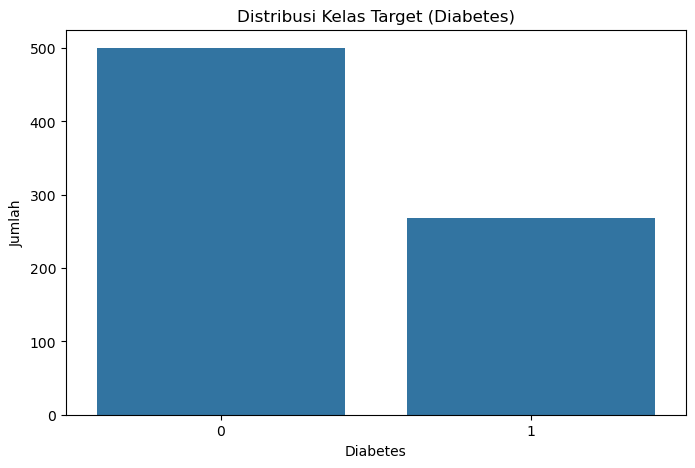

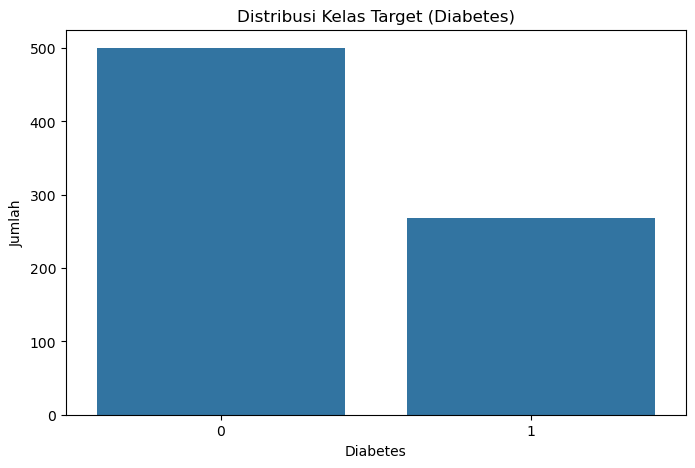

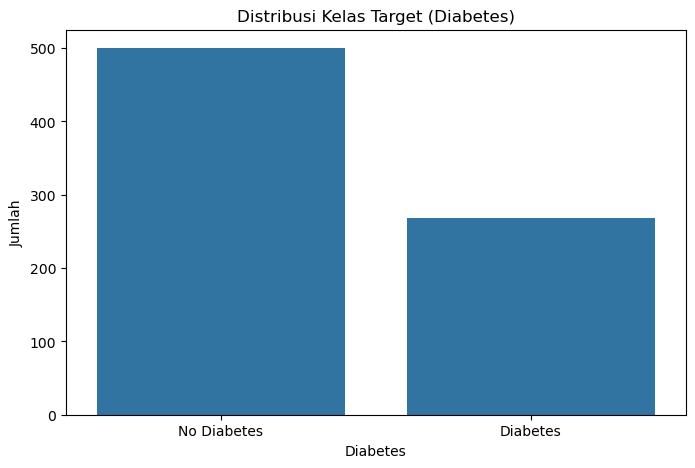

In [17]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Outcome"], data=df)
plt.title("Distribusi Kelas Target (Diabetes)")
plt.xlabel("Diabetes")
plt.ylabel("Jumlah")
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.show()

## Analisa Fitur (Semua Fitur Bertipe Numerik)

In [18]:
# Pilih fitur numerik
features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
features.remove("Outcome")
print("features :", features)

features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


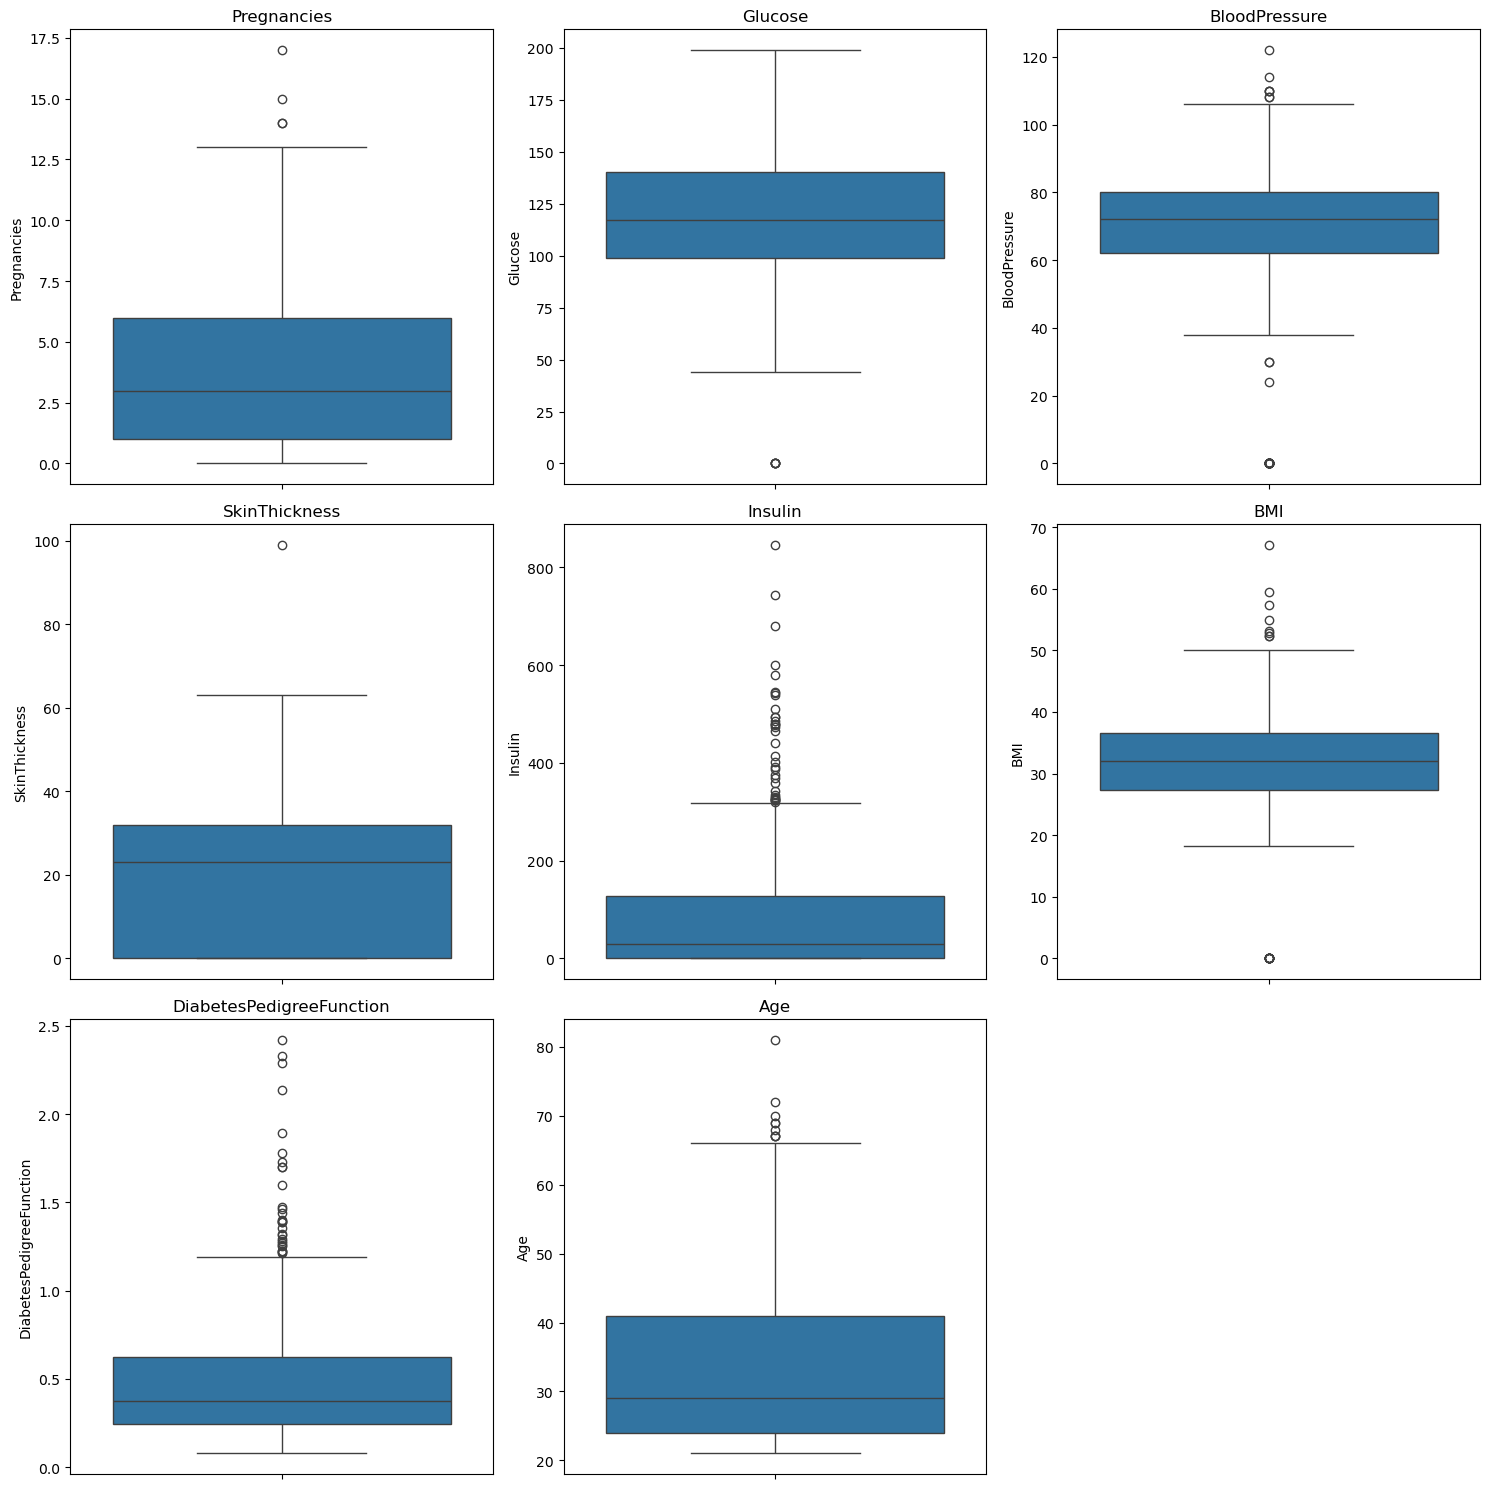

In [19]:
# Hitung jumlah subplot yang dibutuhkan
n_features = len(features)
cols = 3
rows = (n_features + cols - 1) // cols
plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[feature])
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

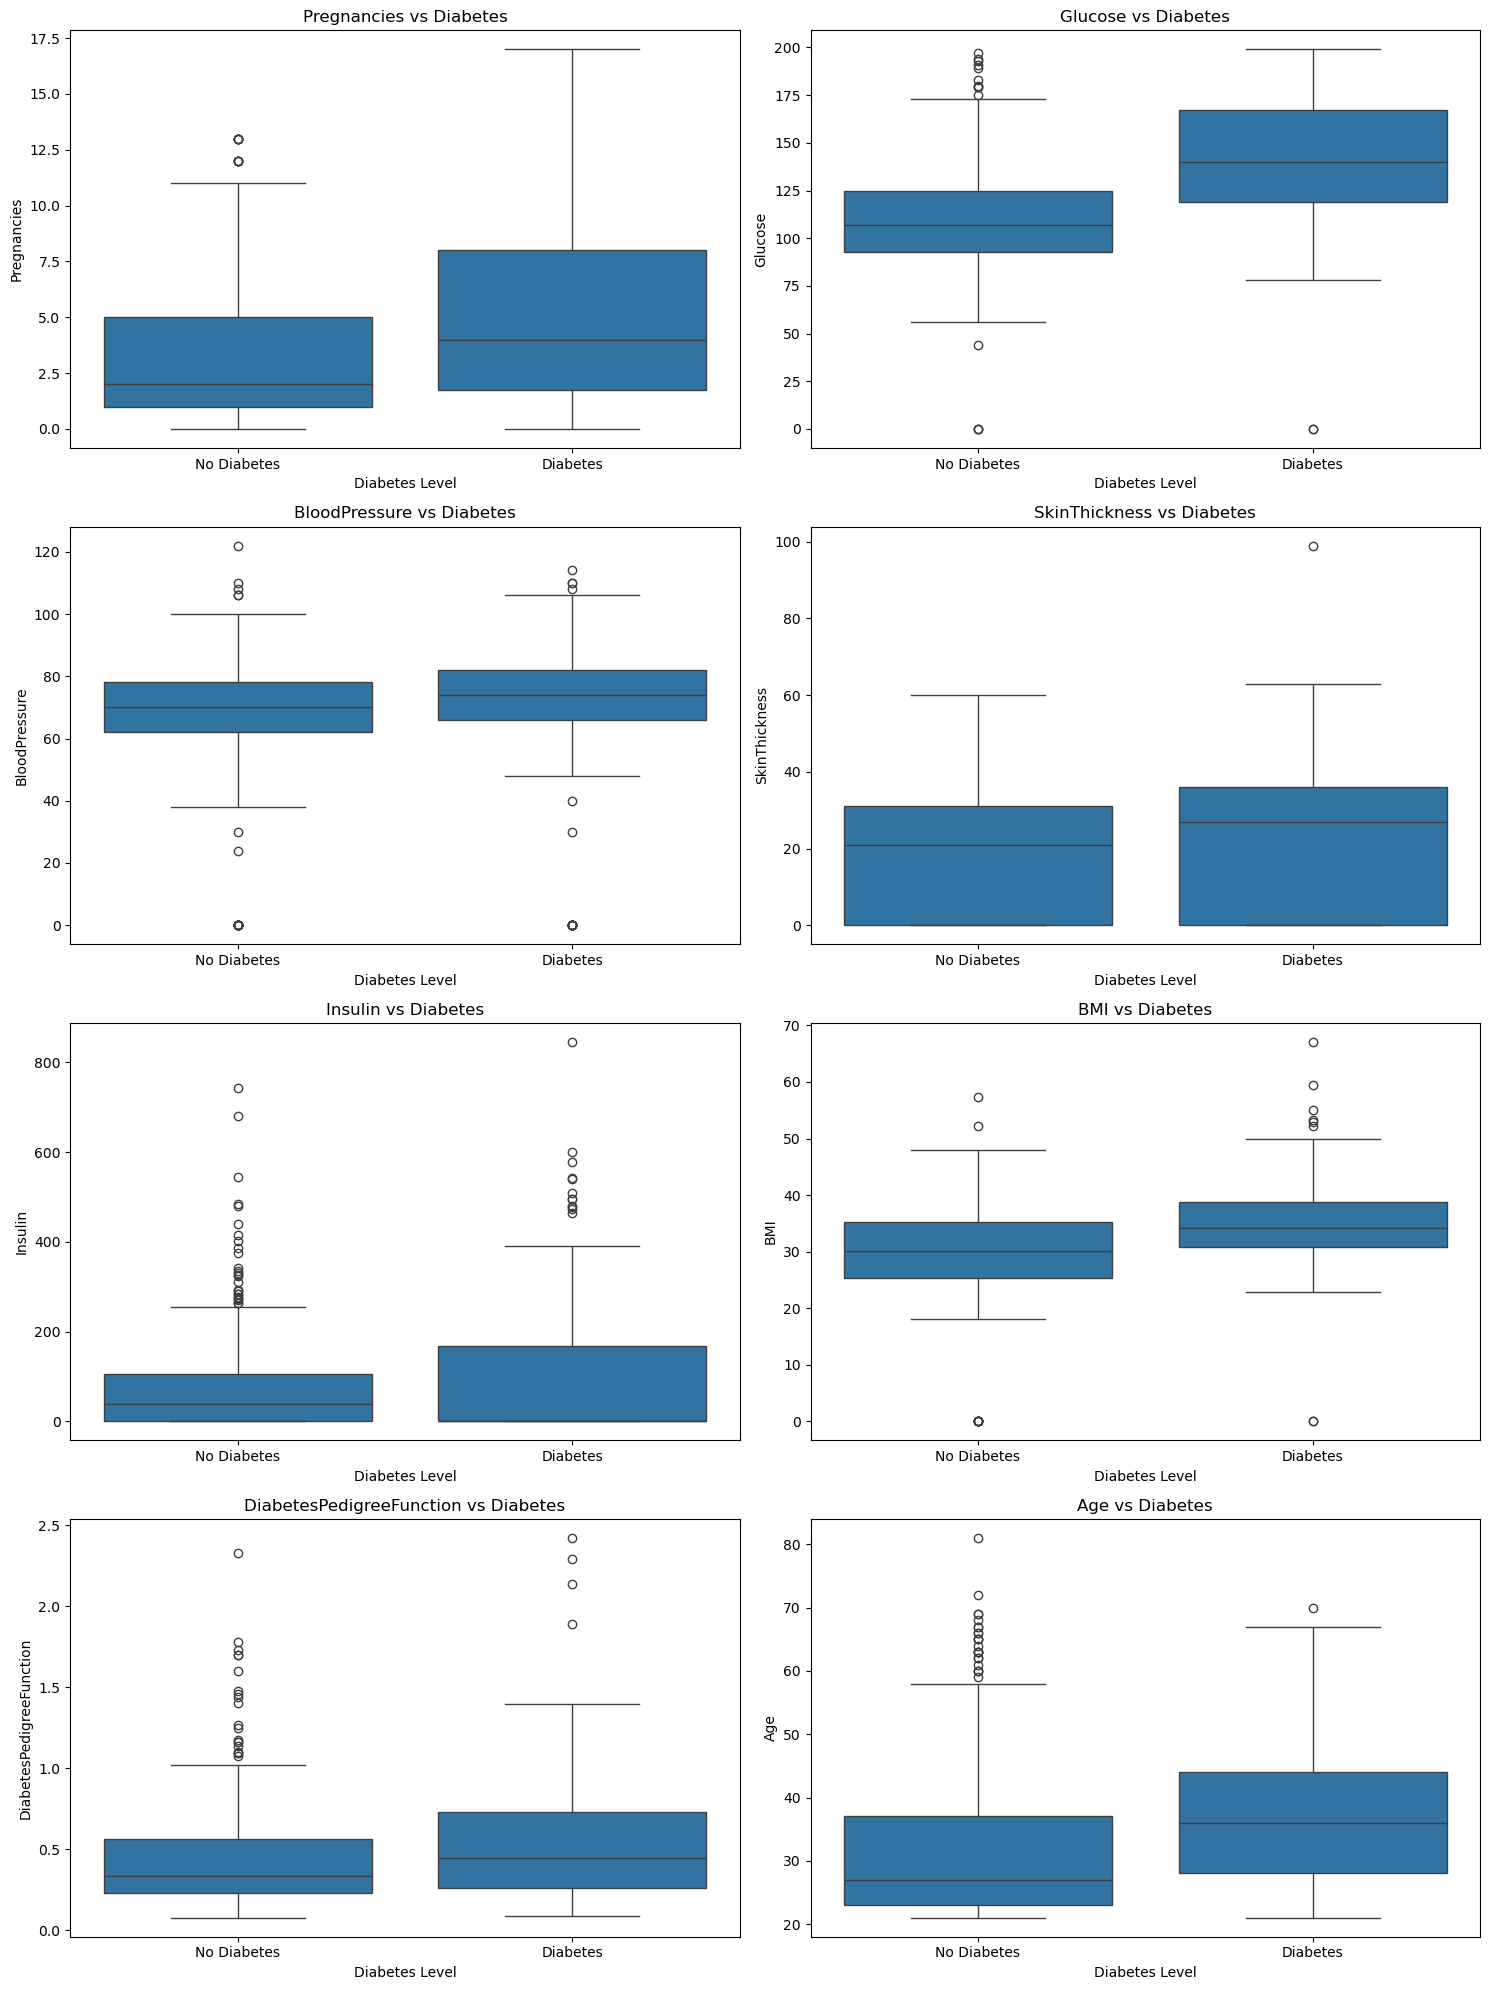

In [20]:
# persebaran data numerik berdasarkan kelas target
# Hitung jumlah subplot yang dibutuhkan
n_features = len(features)
cols = 2
rows = (n_features + cols - 1) // cols
plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df["Outcome"], y=df[feature])
    plt.title(f"{feature} vs Diabetes")
    plt.xlabel("Diabetes Level")
    plt.ylabel(feature)
    plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.tight_layout()
plt.show()

- **Pregnancies**: Wanita dengan diabetes cenderung memiliki jumlah kehamilan lebih banyak.
- **Glucose**: Kadar glukosa jauh lebih tinggi pada kelompok diabetes dan sangat membedakan dua kelompok.
- **BloodPressure**: Tekanan darah relatif mirip antara dua kelompok, dengan perbedaan yang tidak signifikan.
- **SkinThickness**: Ketebalan kulit sedikit lebih tinggi pada kelompok diabetes namun tidak terlalu mencolok.
- **Insulin**: Kelompok diabetes menunjukkan sebaran insulin yang lebih besar, namun dengan banyak outlier.
- **BMI**: Indeks massa tubuh lebih tinggi pada kelompok diabetes, menunjukkan korelasi yang cukup kuat.
- **DiabetesPedigreeFunction**: Nilai DPF sedikit lebih tinggi pada kelompok diabetes, mengindikasikan pengaruh genetik.
- **Age**: Usia rata-rata kelompok diabetes lebih tinggi dibandingkan non-diabetes.
- **Outcome**: Label target klasifikasi, 1 menunjukkan diabetes dan 0 menunjukkan tidak diabetes.


## Matriks Korelasi

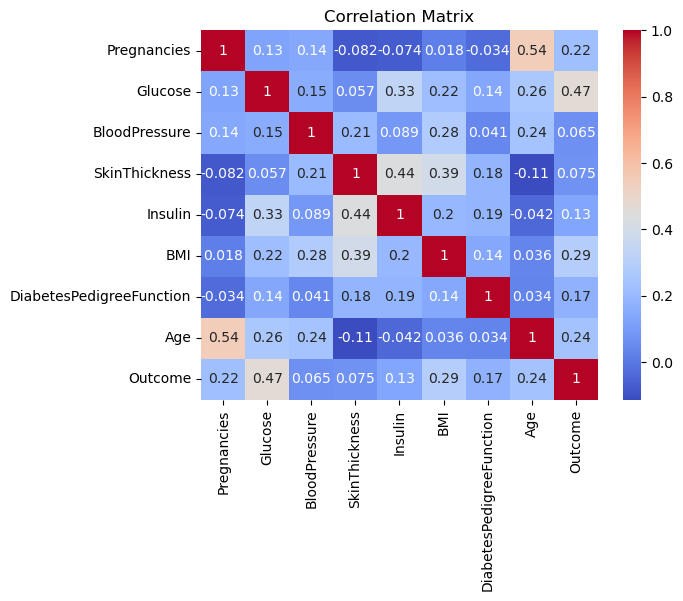

In [21]:
# Korelasi fitur
# Matriks Korelasi
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Cek Missing Values

In [22]:
# Cek missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Cek Data Duplikat

In [23]:
# Cek data duplikat
duplicated_data = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicated_data}")

Jumlah data duplikat: 0


## Hapus Outlier

In [24]:
df_clean = df.copy()

# Hapus outlier dengan metode IQR
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

# Filter data tanpa outlier
df_clean = df_clean[
    ~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)
]

In [25]:
df_clean.shape

(639, 9)

## Data Scaling

In [26]:
# Pilih Kolom Numerikal
df_new = df_clean.copy()
# Drop kolom target
df_new = df_new.drop(
    columns=["Outcome"]
)  
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [27]:
# Lakukan standarisasi
scaler = StandardScaler()
scaled = scaler.fit_transform(df_new)
# Buat DataFrame hasil standarisasi dengan kolom yang sama
df_scaled = pd.DataFrame(scaled, columns=df_new.columns)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230


In [28]:
# Gabungkan dengan  kolom target
df_final = pd.concat(
    [
        df_scaled,
        df_clean[["Outcome"]].reset_index(drop=True),
    ],
    axis=1,
)
df_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132,1
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912,0
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594,1
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093,0
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230,0
...,...,...,...,...,...,...,...,...,...
634,1.901405,-0.621588,0.342113,1.789969,1.434699,0.139091,-1.029575,2.735268,0
635,-0.553756,0.099087,-0.186996,0.419926,-0.829247,0.745724,-0.355625,-0.516184,0
636,0.366929,0.064769,-0.010626,0.158965,0.579430,-0.903072,-0.734473,-0.245230,0
637,-0.860651,0.236358,-1.068846,-1.341558,-0.829247,-0.296440,-0.319735,1.290178,1


## Split Dataset

In [29]:
from sklearn.model_selection import train_test_split
# Split dataset dengan 20 persen data testing
X = df_final.drop("Outcome", axis=1)
y = df_final["Outcome"]
# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
# Cek isi data training dan testing
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
362,-0.553756,-1.239310,-0.539736,0.158965,-0.200374,0.030209,0.270470,-0.967775
603,1.287615,0.030451,1.223963,-1.341558,-0.829247,-0.560869,-0.678643,-0.967775
49,0.980720,-0.175456,-0.539736,-1.341558,-0.829247,0.123537,-0.682630,0.838587
565,-0.553756,0.339312,0.165744,0.354686,1.749135,0.185755,0.645329,-0.696820
555,1.901405,-1.754078,2.987662,0.158965,-0.212951,0.543513,-0.574958,1.290178
...,...,...,...,...,...,...,...,...
494,-1.167546,-1.788395,0.342113,-1.341558,-0.829247,2.067872,-0.937854,1.199860
484,1.287615,-0.655906,0.342113,-1.341558,-0.829247,1.041263,-0.953805,0.838587
275,-1.167546,1.574755,0.342113,1.463769,2.378009,2.472293,-0.678643,-0.606502
588,-0.246861,1.849298,0.518483,1.202808,1.497586,0.279084,2.156731,-0.154912


In [31]:
print("Train set:", X_train.shape)
print("Test set :", X_test.shape)
print("Train class distribution:", y_train.value_counts(normalize=True))
print("Test class distribution :", y_test.value_counts(normalize=True))

Train set: (511, 8)
Test set : (128, 8)
Train class distribution: Outcome
0    0.686888
1    0.313112
Name: proportion, dtype: float64
Test class distribution : Outcome
0    0.6875
1    0.3125
Name: proportion, dtype: float64


C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_2652\2838699488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set1")


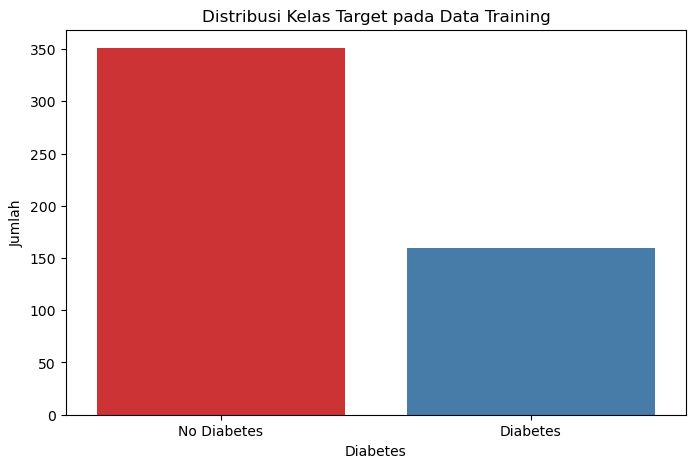

In [32]:
# Visualisasi jumlah data training
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette="Set1")
plt.title("Distribusi Kelas Target pada Data Training")
plt.xlabel("Diabetes")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.show()

C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_2652\3115644483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="Set1")


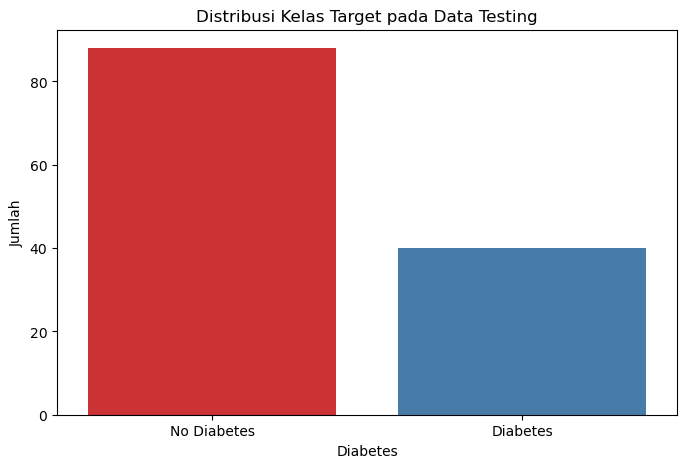

In [33]:
# Visualisasi jumlah data testing
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, palette="Set1")
plt.title("Distribusi Kelas Target pada Data Testing")
plt.xlabel("Diabetes")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.show()